**Minería de datos**

# Tarea: Entendiendo Jupyter Lab, Github, Python y Regresión Lineal

##  Autor

1. Juan Sebastián Gómez Duque, jgomezd@unal.edu.co

## Descripción de la tarea

Escriba un ensayo sobre el tema Regresión Lineal, en un cuaderno de Jupyter.

Debe incluir:

* [Introducción.](#Introducción)
* [Breve historia.](#Breve-historia)
* [El planteamiento del algortimo.](#El-planteamiento-del-algortimo)
* [Ejemplo de regresión lineal.](#Ejemplo-de-regresión-lineal)
* [Conclusiones.](#Conclusiones)


El cuaderno debe incluir: títulos, enlaces (por ejemplo a Wikipedia), imágenes locales, imágenes de internet, el plantemiento matemático del problema, y su implementación en Ptyhon. Incluya gŕaficas hechas en Matplotlib. Además debe usar como mínimo: Numpy (para manejo de arreglos) y Pandas para lectura de datos.

Esta tarea es para entregar en su github personal, en cual colocará el cuaderno de Jupyer Lab y la renderización con nbview y html.

Puede basarse en las siguiente referencias. Lo que use lo referencia en su bibliografía y use enlaces a las cosas.

Podemos ayudarnos, pero la tarea es individual.

## Introducción 

Se puede tomar la regresión lineal como el caso en que una variable o un conjunto de variables intentan explicar el comportamiento de alguna variable de interes por medio de una combinación lineal. A las variables que intentan explicar el comportamiento se les conoce como **variables independientes** y la varibale de interés se le conoce como **variable dependiente** o **respuesta**.

Supongamos entonces que queremos modelar la edad de los hijos con la altura de sus padres, en esta consideramos a **Y** como la edad de los hijos mientras que **X** es la edad de sus padres. Luego se plantea el sistema de lineal como **Y=a+$\beta$ X** donde a es la intersección (el valor de Y cuando X=0) y $\beta$ se le denomina el coeficiente de la regresión.

(Idea tomada de: [Linear Regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)) 

La regresión lineal se basa bastante en el uso de diagramas de dispersión para ver gráficamente la relación entre las variables. 

En estos diagramas la variable explicativa se situa en el eje horizontal mientras que la variable respuesta se ubica vertical en el plano.

A continuación veremos cómo se relaciona la edad de los hijos con la edad de sus padres, con el ejemplo que planteó Karl Pearson con 1,078 pares de partcipantes.


![Ploted](http://www.analytictech.com/mb313/images/scatte1.gif)

**Figura 1.** *Gráfico de dispersión entre altura de padres vs altura de hijos*

Tomado de: [The Scatter Diagram](http://www.analytictech.com/mb313/scatter.htm)

Se nota pues como los datos de las alturas de los hijos parece aumentar más en cuanto la altura de sus padres fuera mayor por tanto se nota una marcada tendencia lineal que posteriormente se se traduce en una recta que ajusta los puntos tal y como se muestra en la [Figura 1.](#Figura_1.) 

## Breve historia

Legendre introdujo el método de minimos cuadrados en 1805, a partir de este avance Legendre y Gauss basaron  su trabajo aplicando esto en la astronomía. 

Gauss publica un trabajo incluyendo el teorema de Gauss-Markov que sería el pie para avanzar en el desarrollo de los modelos regresivos.

"El término "regresión" fue acuñado por Francis Galton en el siglo XIX para describir un fenómeno biológico. El fenómeno fue que las alturas de los descendientes de antepasados altos tienden a retroceder hacia un promedio normal (un fenómeno también conocido como regresión hacia la media )."

Tomado de: [Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis)


Para los años 50's y 60's, se utilizaron "calculadoras" electromecánicas de escritorio para calcular las regresiones y con el avance de computadores modernos, la introducción de softwares especializados para el tratamiento estadístico, como R y S-Plus, se dieron grandes pasos en el manejo de cálculos estadístico que implica un manejo más eficiente de modelos de regresión,


## El planteamiento del algortimo

1. Se grafican las variables para ver posibles relaciones.
2. Se plantea el modelo de regresión en base a lo observado
3. Se definen los supuestos del modelo
4. Se realiza el cálculo de la regresión
5. Se comprueban los supuestos del modelo
6. Se analiza el ajuste de la regresión

## Ejemplo de regresión lineal

Se utiliza las librerías **numpy**, **Pandas** y **matplotlib** para obtener algunas librerías y tratar los datos de la regresión lineal



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para este ejemplo se utilizará la base de datoas **Boston** que es bastante utilizado para el aprendizaje de la regresión. 
Esta base recoge la mediana del valor de la vivienda en 506 áreas residenciales de Boston. Junto con el precio, se han registrado 13 variables adicionales.
* **lstat**: porcentaje de población en condición de pobreza.
* **medv**: Valor mediano de las casas ocupadas por el dueño en unidades de $1000s.

In [13]:
Boston = pd.read_csv ('C:/Users/dux13\OneDrive - Universidad Nacional de Colombia/Documentos/Ciencia de datos/BostonDB.csv')
print(Boston)

     Unnamed: 0  lstat  medv
0             1   4.98  24.0
1             2   9.14  21.6
2             3   4.03  34.7
3             4   2.94  33.4
4             5   5.33  36.2
..          ...    ...   ...
501         502   9.67  22.4
502         503   9.08  20.6
503         504   5.64  23.9
504         505   6.48  22.0
505         506   7.88  11.9

[506 rows x 3 columns]


visualizamos entonces por medio de un gráfico de dispersión la relación entre estas dos variables.

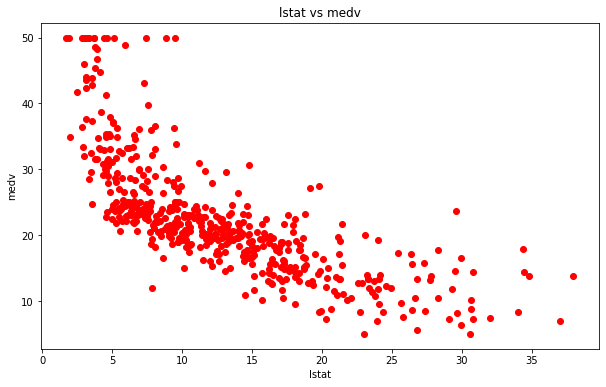

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(Boston['lstat'], Boston['medv'], 
            c='red', label='Boston')
plt.title('lstat vs medv')
plt.xlabel('lstat')
plt.ylabel('medv')

plt.show()

Se ve claramente una tendencia decreciente de medv mientras más aumente el lstat, lo que significa que el valor mediano de las casas ocupadas por el dueño en unidades de $1000 decrece mientras que el porcentaje de población en condición de pobreza aumente.

In [34]:
#Se importa la librería para trazar la regresión lineal
from sklearn.linear_model import LinearRegression 

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
x=np.array(Boston['lstat'])
regresion_lineal.fit(x.reshape(-1,1), Boston['medv']) 

# vemos los parámetros que ha estimado la regresión lineal
print('Y = ' + str(regresion_lineal.intercept_) +'+'+ str(regresion_lineal.coef_)+'X')

Y = 34.55384087938311+[-0.95004935]X


Por lo tanto el modelo tiene un intercepto de 34.5, es decir el valor de medv cuando lstat es 0 y el coeficiente $\beta=-0.95$ por lo tanto esta es la pendiente o el cambio en medv cuando la variable independiente aumenta una unidad.

Supongamos que queremos predecir ¿eel valor medio de las casa cuando el porcentaje de pobreza es del 5%

In [36]:
# vamos a predicir y = regresion_lineal(5)
nuevo_x = np.array([5]) 
print(nuevo_x)
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))
print(prediccion)

[5]
[29.80359411]


Entonces cuando la pobreza es del 5% entonces el valor mediano de las casas se encuentra ubicado alrededor de los 30000 dolares.

### Calidad de la regresión

Vamos a evaluar la calidad del modelo aprendido usando solamente los datos de entrenamiento. Recuerda que en un problema real, hay que evaluar también la capacidad de generalización del modelo. Podemos evaluar la calidad del modelo midiendo el error cuadrático medio y el coeficiente de determinación $R^2$

Vemos primeramente **el error cuadrático medio**

In [37]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = Boston['medv'], y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 38.48296722989414
Raíz del Error Cuadrático Medio (RMSE) = 6.203464131426419


Vemos también el coeficiente de determinación $R^2$

El coeficiente de determinación R2 determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo

In [38]:
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(x.reshape(-1,1), Boston['medv'])
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.5441462975864799


Por tanto se ve que el modelo explica el 54.4% en la variabilidad de la respuesta.

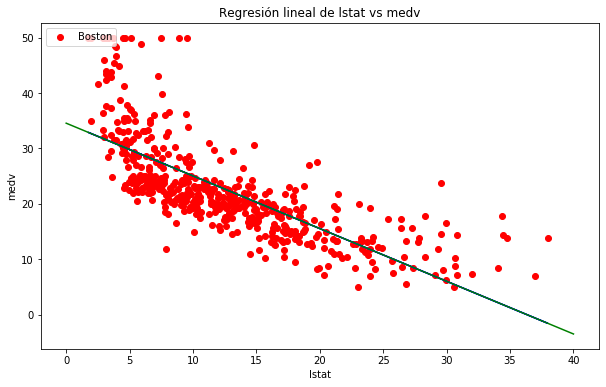

In [55]:
plt.figure(figsize=(10, 6))
y_pred = regresion_lineal.predict(x.reshape(-1,1))
plt.scatter(x, Boston['medv'],c='red', label='Boston')
plt.plot(x, y_pred, color='blue')
x_real = np.array([0, 40])
y_real = regresion_lineal.intercept_+x_real*regresion_lineal.coef_
plt.plot(x_real, y_real, color='green')
plt.title('Regresión lineal de lstat vs medv')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.legend(loc='upper left')
plt.show()


Se nota entonces un modelo que explica más del 50% de la variablidad de la respuesta y además gráficamente se nota un buen ajuste del modelo en la gráfica de dispersión

## Conclusiones

La regresión lineal es muy útil para predecir el comportamiento en base a otras variables que puedan tener relación con esta. Es un proceso sencillo que puede explicarnos algunas carcteristicas de una variable de la cuál estemos interesados.




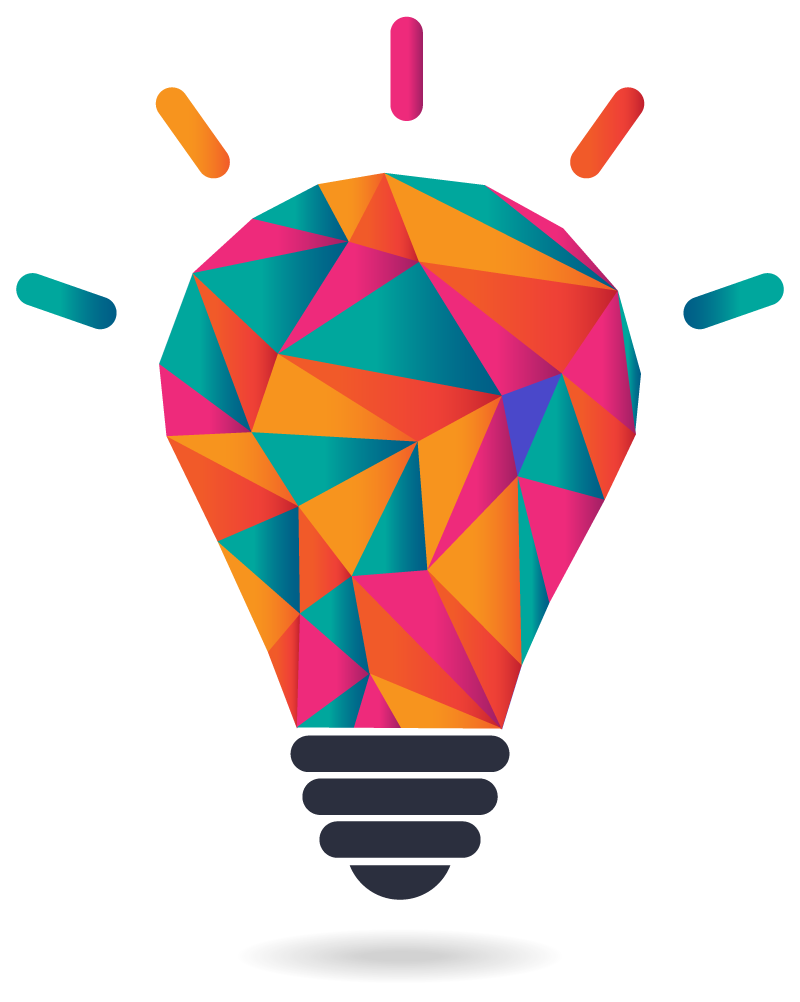

In [23]:
from IPython.display import Image
Image("img/Imagen2.PNG", width = 250, height = 50)